# Part II - Loan Data Exploration Presentation
## by Oluwaseyi Adisa

## Summary Points
1. Investors rely on the credit grade of borrowers to decide whether to fund the loan or not.
2. The credit grade of borrowers also determines if they will get the loan. A higher grade means there a very high chance they will get the loan.

## Investigation Overview


These points show a key metric in getting loans approved. I will be polishing the already made visualisations


## Dataset Overview

This dataset contains data on about 113,000 loans made in 2009. The dataset is from Prosper Marketplace, Inc. Prosper has a subsidiary (Prosper.com) where individuals can either invest or request for loans

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv("prosperLoanData.csv")

credit_order = pd.api.types.CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'], ordered=True)
df_loan.CreditGrade = df_loan.CreditGrade.astype(credit_order)

income_cat = pd.api.types.CategoricalDtype(categories=['Not employed' ,'$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed',], ordered=True)
df_loan.IncomeRange = df_loan.IncomeRange.astype(income_cat)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

This visualization shows that most of the borrowers have a 'C' credit grade


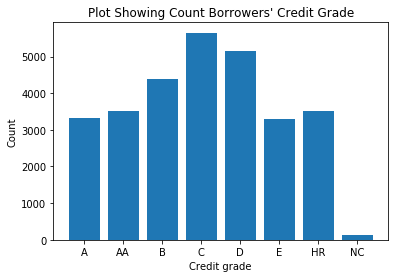

In [11]:
credit_grade = df_loan.CreditGrade.value_counts(sort=False)
plt.bar(credit_grade.index, credit_grade)
plt.xlabel('Credit grade')
plt.ylabel('Count')
plt.title('Plot Showing Count Borrowers\' Credit Grade');

## (Visualization 2)
The higher the credit grades of borrowers, the highers their chances of getting loans funded by investors.


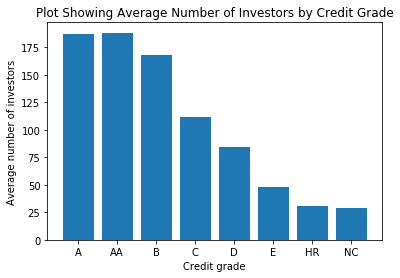

In [10]:
grade_groupby = df_loan[['CreditGrade', 'Investors']].groupby('CreditGrade').mean()
plt.bar(grade_groupby.index, grade_groupby.Investors)
plt.xlabel('Credit grade')
plt.ylabel('Average number of investors')
plt.title('Plot Showing Average Number of Investors by Credit Grade');

## (Visualization 3)
This next visualization shows that investors fund loans made by unemployed borrowers and people who do not earn income.


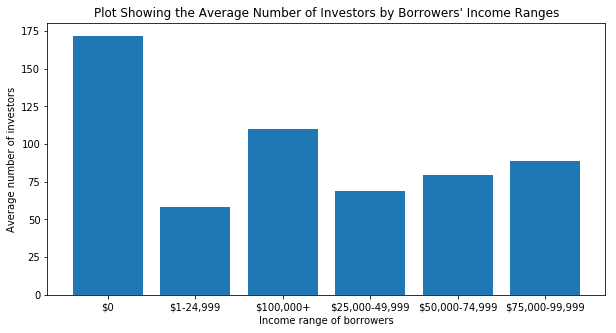

In [13]:
income_groupby = df_loan[['IncomeRange', 'Investors']].groupby('IncomeRange').mean()
income_groupby.loc['$0'] = income_groupby.loc['$0'] + income_groupby.loc['Not employed']
income_groupby = income_groupby.drop(labels=['Not employed', 'Not displayed'])
plt.figure(figsize=(10, 5))
plt.bar(income_groupby.index, income_groupby.Investors)
plt.xlabel('Income range of borrowers')
plt.ylabel('Average number of investors')
plt.title('Plot Showing the Average Number of Investors by Borrowers\' Income Ranges');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 